In [1]:
import pandas as pd
import numpy as np
from faker import Faker

In [2]:
df = pd.read_csv('fraud_data.csv')

In [3]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


# Adding device_type column

In [4]:
import random

# Function to generate 'device_type' with imbalanced distribution
def generate_device_type():
    return random.choices(['mobile', 'desktop'], weights=[65, 35], k=1)[0]

# Adding the new 'device_type' column with random imbalanced distribution
df['device_type'] = [generate_device_type() for _ in range(len(df))]

In [5]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,device_type
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1,mobile
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1,mobile
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1,desktop
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1,mobile
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1,mobile


# Adding device_info new column

In [6]:
# Initializing Faker
faker = Faker()

In [7]:
# Function to generate 'device_info' based on 'device_type'
def generate_device_info(device_type):
    if device_type == 'desktop':
        return random.choice(['MacOs', 'Windows', 'Trident/7.0'])
    else:
        return faker.random_element([
            'iPhone 14', 'Samsung Galaxy S23', 'Google Pixel 7', 
            'OnePlus 11', 'Motorola Edge 30', 'iPhone SE', 
            'Samsung Galaxy A54', 'Google Pixel 6a', 'Nokia G50'
        ])

In [8]:
# Add the new 'device_info' column based on the existing 'device_type'
df['device_info'] = df['device_type'].apply(generate_device_info)

In [9]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,device_type,device_info
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1,mobile,Google Pixel 6a
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1,mobile,Google Pixel 6a
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1,desktop,Windows
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1,mobile,iPhone 14
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1,mobile,Motorola Edge 30


# Adding card network new column 

In [10]:
# Function to generate card network with more weightage to 'visa' and 'mastercard'
def generate_weighted_card_network():
    # 35% visa, 30% mastercard, 15% discover, 20% american express
    return random.choices(['visa', 'mastercard', 'discover', 'american express'], weights=[35, 30, 15, 20], k=1)[0]

In [11]:
# Adding the new 'card_network' column with weighted values
df['card_network'] = [generate_weighted_card_network() for _ in range(len(df))]

In [12]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,device_type,device_info,card_network
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1,mobile,Google Pixel 6a,mastercard
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1,mobile,Google Pixel 6a,discover
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1,desktop,Windows,mastercard
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1,mobile,iPhone 14,discover
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1,mobile,Motorola Edge 30,mastercard


# Adding new 10 states for the exisiting dataset and adding the synthesized data to the existing dataset

In [13]:
# Initialize Faker
faker = Faker()

# Extracting unique states already present in the dataset
existing_states = df['state'].unique()

In [14]:
# List of additional states to add data for
new_states = ['CA', 'TX', 'NY', 'FL', 'IL', 'PA', 'OH', 'GA', 'NC', 'MI']

In [15]:
# Define a dictionary that maps each state to a list of cities
state_to_cities = {
    'CA': ['Los Angeles', 'San Francisco', 'San Diego', 'Sacramento', 'San Jose'],
    'TX': ['Houston', 'Dallas', 'Austin', 'San Antonio', 'Fort Worth'],
    'FL': ['Miami', 'Orlando', 'Tampa', 'Jacksonville', 'Tallahassee'],
    'NY': ['New York', 'Buffalo', 'Rochester', 'Albany', 'Syracuse'],
    'IL': ['Chicago', 'Springfield', 'Naperville', 'Rockford', 'Peoria'],
    'PA': ['Philadelphia', 'Pittsburgh', 'Harrisburg', 'Allentown', 'Scranton'],
    'OH': ['Columbus', 'Cleveland', 'Cincinnati', 'Toledo', 'Akron'],
    'GA': ['Atlanta', 'Savannah', 'Augusta', 'Macon', 'Columbus'],
    'NC': ['Charlotte', 'Raleigh', 'Durham', 'Greensboro', 'Winston-Salem'],
    'MI': ['Detroit', 'Grand Rapids', 'Ann Arbor', 'Lansing', 'Flint']
}

In [16]:
# Function to generate synthetic data for the new states
def generate_synthetic_data():
    state = random.choice(list(state_to_cities.keys()))  # Randomly pick a state from the list
    city = random.choice(state_to_cities[state])  # Select a city from the corresponding state
    city_pop = faker.random_int(min=500, max=100000)
    lat = faker.latitude()
    long = faker.longitude()
    job = faker.job()
    dob = faker.date_of_birth(minimum_age=18, maximum_age=90)
    trans_num = faker.sha256()
    trans_date = faker.date_time_this_decade().strftime("%m-%d-%Y %H:%M")
    merchant = faker.company()
    category = random.choice(['grocery_net', 'shopping_net', 'misc_pos', 'grocery_pos', 'health_fitness'])
    amt = round(random.uniform(5, 1000), 2)
    is_fraud = random.choice([0, 1])
    merch_lat = faker.latitude()
    merch_long = faker.longitude()
    device_type = generate_device_type()
    device_info = generate_device_info(device_type)
    card_network = generate_weighted_card_network()

    return {
        'trans_date_trans_time': trans_date,
        'merchant': merchant,
        'category': category,
        'amt': amt,
        'city': city,
        'state': state,
        'lat': lat,
        'long': long,
        'city_pop': city_pop,
        'job': job,
        'dob': dob.strftime("%m-%d-%Y"),
        'trans_num': trans_num,
        'merch_lat': merch_lat,
        'merch_long': merch_long,
        'is_fraud': is_fraud,
        'device_type': device_type,
        'device_info': device_info,
        'card_network': card_network
    }

In [17]:
# Determine how many new rows to generate (half of the existing rows)
num_new_rows = len(df) // 2

In [18]:
# Generate the synthetic data for the new rows
new_data = pd.DataFrame([generate_synthetic_data() for _ in range(num_new_rows)])

In [19]:
# Concatenate the new synthetic data with the original dataset
extended_data = pd.concat([df, new_data], ignore_index=True)

In [20]:
extended_data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,device_type,device_info,card_network
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1,mobile,Google Pixel 6a,mastercard
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1,mobile,Google Pixel 6a,discover
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1,desktop,Windows,mastercard
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1,mobile,iPhone 14,discover
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1,mobile,Motorola Edge 30,mastercard


In [21]:
row_count = len(extended_data)
print(row_count)

21669


# Adding new column named email to the extended_data

In [22]:
# Function to generate random email domains
def generate_email():
    return random.choice(['@gmail.com', '@yahoo.com', '@hotmail.com', '@outlook.com'])

In [23]:
# Adding the new 'email' column with random email values
extended_data['email_domain'] = [generate_email() for _ in range(len(extended_data))]

In [24]:
# Rename the dataframe from extended_data to final_data
final_data = extended_data.copy()

In [25]:
final_data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,device_type,device_info,card_network,email_domain
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1,mobile,Google Pixel 6a,mastercard,@gmail.com
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1,mobile,Google Pixel 6a,discover,@gmail.com
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1,desktop,Windows,mastercard,@outlook.com
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1,mobile,iPhone 14,discover,@gmail.com
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1,mobile,Motorola Edge 30,mastercard,@hotmail.com


In [30]:
# Save the final dataframe
final_data.to_csv('final_fraud_data.csv', index=False)

# Data Preprocessing and EDA

In [185]:
#Importing the neccessary libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral11  # You can choose other palettes if needed
from bokeh.palettes import Category20
from bokeh.palettes import Category10 
from bokeh.transform import dodge
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [31]:
df = pd.read_csv('final_fraud_data.csv')

In [32]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,device_type,device_info,card_network,email_domain
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1,mobile,Google Pixel 6a,mastercard,@gmail.com
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1,mobile,Google Pixel 6a,discover,@gmail.com
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1,desktop,Windows,mastercard,@outlook.com
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1,mobile,iPhone 14,discover,@gmail.com
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1,mobile,Motorola Edge 30,mastercard,@hotmail.com


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21669 entries, 0 to 21668
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  21669 non-null  object 
 1   merchant               21669 non-null  object 
 2   category               21669 non-null  object 
 3   amt                    21669 non-null  float64
 4   city                   21669 non-null  object 
 5   state                  21669 non-null  object 
 6   lat                    21669 non-null  float64
 7   long                   21669 non-null  float64
 8   city_pop               21669 non-null  int64  
 9   job                    21669 non-null  object 
 10  dob                    21669 non-null  object 
 11  trans_num              21669 non-null  object 
 12  merch_lat              21669 non-null  float64
 13  merch_long             21669 non-null  float64
 14  is_fraud               21669 non-null  object 
 15  de

In [34]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,21669.000000,21669.000000,21669.000000,2.166900e+04,21669.000000,21669.000000
mean,251.181461,26.673629,-73.788316,8.798289e+04,26.692608,-73.911435
std,308.947771,35.632978,80.435733,2.390451e+05,35.512494,80.159210
min,1.000000,-89.965964,-179.917399,4.600000e+01,-89.987353,-179.809709
25%,29.150000,33.288700,-118.497100,8.950000e+02,32.870021,-118.791589
50%,88.440000,38.654700,-105.693300,1.487100e+04,38.721450,-105.674513
75%,404.950000,42.730000,-88.568161,6.736600e+04,42.418833,-89.033346
max,3261.470000,89.945077,179.979144,2.383912e+06,89.996506,179.907829


In [35]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'device_type', 'device_info', 'card_network',
       'email_domain'],
      dtype='object')

# we can clearly see the is_fraud column data type is object and having different data values other than 1,0 hence changing into integer and cleaning it

In [36]:
df['is_fraud'].isna().sum() # No missing values

0

In [37]:
print("Unique values in 'is_fraud' column:", df['is_fraud'].unique())

Unique values in 'is_fraud' column: ['1' '1"2020-12-24 16:56:24"' '0' '0"2019-01-01 00:00:44"']


In [38]:
df['is_fraud'].value_counts() #counting the unique values in the is_fraud column

is_fraud
0                         16268
1                          5399
1"2020-12-24 16:56:24"        1
0"2019-01-01 00:00:44"        1
Name: count, dtype: int64

In [39]:
# Cleaning the 'is_fraud' column and extracting the first character to deal with malformed data and converting to integer
df['is_fraud'] = df['is_fraud'].astype(str).str.extract(r'(\d)').fillna(0).astype(int)


#Printing unique values in 'is_fraud' column to verify conversion
print("Unique values in 'is_fraud' column:", df['is_fraud'].unique())

Unique values in 'is_fraud' column: [1 0]


In [40]:
df['is_fraud'].value_counts() #counting the unique values in the is_fraud column after cleaning the column

is_fraud
0    16269
1     5400
Name: count, dtype: int64

In [41]:
# Grouping by product category and counting the number fraud occurrences
fraud_counts_by_category = df[df['is_fraud'] == 1].groupby('category').size().reset_index(name='fraud_count')
# Displaying first five rows
fraud_counts_by_category.head()

,category,fraud_count
0,entertainment,59
1,food_dining,39
2,gas_transport,159
3,grocery_net,758
4,grocery_pos,1129


In [42]:
# Sort the fraud counts by category in descending order
fraud_counts_by_category_sorted = fraud_counts_by_category.sort_values(by='fraud_count', ascending=False)

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sxp220184\AppData\Local\Temp\ipykernel_14240\106463163.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




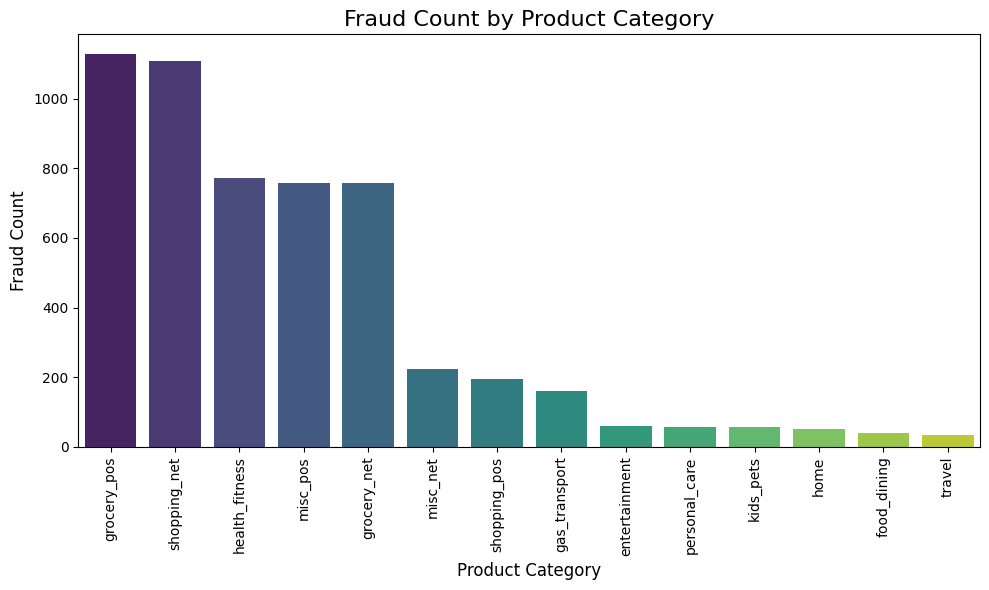

In [44]:
# Creating the bar plot for fraud count by product category using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=fraud_counts_by_category_sorted, 
    x='category', 
    y='fraud_count', 
    palette='viridis'  # You can choose any color palette here
)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Fraud Count by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Fraud Count', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [45]:

# Filtering for fraudulent transactions, grouping by state, and counting occurrences
frauds_by_state = df[df['is_fraud'] == 1].groupby('state').size().reset_index(name='fraud_count')

# Grouping by state to count total transactions and merge with fraud counts
merged_df = df.groupby('state').size().reset_index(name='total_transactions').merge(frauds_by_state, on='state', how='left')
# Displaying the merged DataFrame
merged_df

,state,total_transactions,fraud_count
0,AK,173,65
1,AZ,673,64
2,CA,4101,758
3,CO,856,115
4,FL,736,364
5,GA,727,362
6,HI,172,16
7,ID,347,33
8,IL,702,329
9,MI,710,339


In [46]:
# Checking for null values in the merged DataFrame
null_values = merged_df.isnull().sum()
# Displaying the count of null values for each column
null_values

state                 0
total_transactions    0
fraud_count           0
dtype: int64

# Bar chart for fraud and total transactions

In [63]:
#Sorting the merged_df by fraud counts
sorted_df = merged_df.sort_values(by='fraud_count', ascending=False)

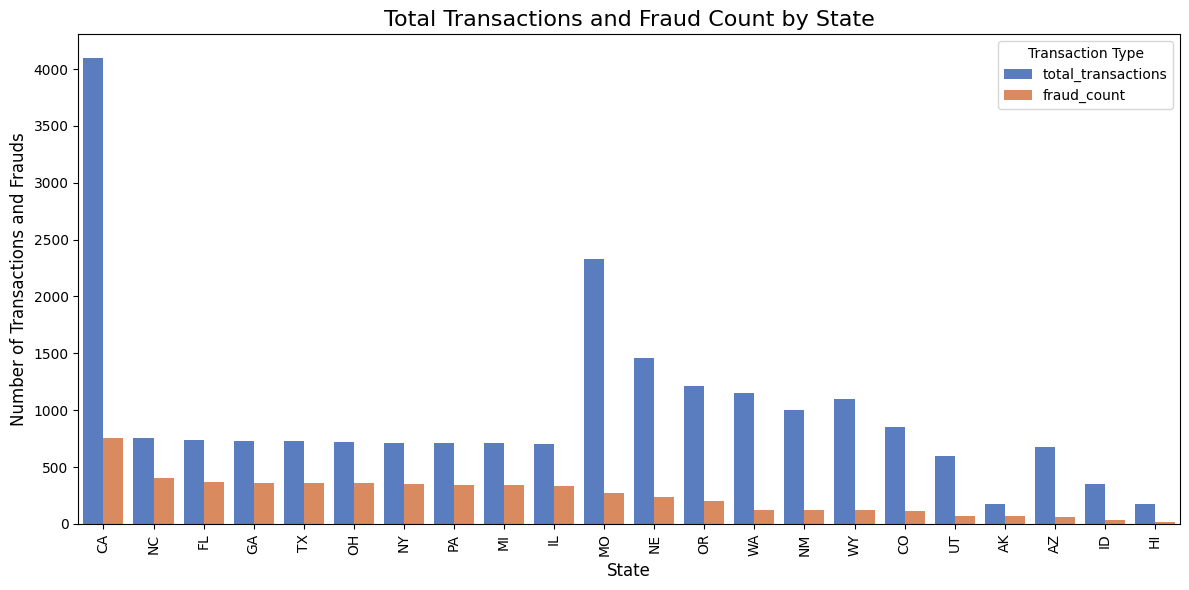

In [48]:
# Melting the dataframe to long format for easier plotting with Seaborn
melted_df = pd.melt(sorted_df, id_vars='state', value_vars=['total_transactions', 'fraud_count'],
                    var_name='Transaction Type', value_name='Count')

# Creating the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='Count', hue='Transaction Type', data=melted_df, palette='muted')

# Customizing the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Total Transactions and Fraud Count by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Transactions and Frauds', fontsize=12)
plt.legend(title='Transaction Type')

# Display the plot
plt.tight_layout()
plt.show()

# Interactive graph for combination of both frad and total transactions

In [71]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import dodge
from bokeh.io import output_notebook

# Ensure Bokeh plots render in the notebook
output_notebook()

# Prepare the data (long format)
melted_df = pd.melt(sorted_df, id_vars='state', value_vars=['total_transactions', 'fraud_count'],
                    var_name='Transaction Type', value_name='Count')

Loading BokehJS ...

In [75]:
# Separate data for total transactions and fraud counts
total_transactions_df = melted_df[melted_df['Transaction Type'] == 'total_transactions']
fraud_count_df = melted_df[melted_df['Transaction Type'] == 'fraud_count']

In [76]:
# Create ColumnDataSources for both categories
total_source = ColumnDataSource(total_transactions_df)
fraud_source = ColumnDataSource(fraud_count_df)

In [77]:
# Create the figure
p = figure(
    x_range=sorted_df['state'], 
    height=600, width=800, 
    title="Total Transactions and Fraud Count by State",
    toolbar_location=None, tools="")

# Add bars for total transactions
p.vbar(x=dodge('state', -0.15, range=p.x_range), top='Count', width=0.3, source=total_source, 
       color="blue", legend_label="Total Transactions")

# Add bars for fraud count
p.vbar(x=dodge('state', 0.15, range=p.x_range), top='Count', width=0.3, source=fraud_source, 
       color="red", legend_label="Fraud Count")

# Customize plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1  # Rotate x-axis labels
p.legend.orientation = "vertical"
p.legend.location = "top_right"

# Adding hover tool for interaction
hover = HoverTool()
hover.tooltips = [
    ("State", "@state"),
    ("Count", "@Count"),
    ("Transaction Type", "@{Transaction Type}")
]
p.add_tools(hover)

# Display the plot
show(p)

# Bar chart for only fraud transactions

C:\Users\sxp220184\AppData\Local\Temp\ipykernel_14240\3219487697.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




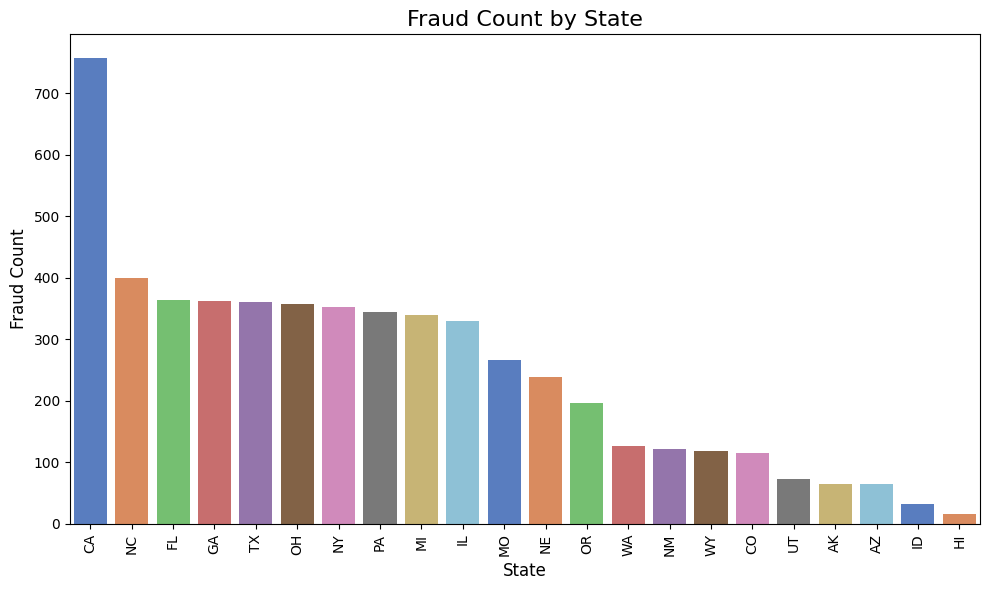

In [49]:
# Creating the bar plot for fraud count by state using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    x='state', 
    y='fraud_count', 
    data=sorted_df, 
    palette='muted'
)

# Customizing the plot
plt.title('Fraud Count by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Fraud Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.tight_layout()
plt.show()

# Interactive Bar chart for fraud transactions

In [67]:
# Ensure Bokeh plots render in the notebook
output_notebook()

# Prepare the data
source = ColumnDataSource(data={
    'state': sorted_df['state'],
    'fraud_count': sorted_df['fraud_count'],
    'total_transactions': sorted_df['total_transactions']
})

Loading BokehJS ...

In [69]:
# Define a color mapper to assign different colors for each state
color_map = factor_cmap(field_name='state', palette=Spectral11, factors=sorted_df['state'])

In [70]:
# Create the figure with updated height and width attributes
p = figure(
    x_range=sorted_df['state'], 
    height=600, width=600,  # Use 'height' and 'width' instead of 'plot_height' and 'plot_width'
    title="Fraud Count by State",
    toolbar_location=None, tools="")

# Add bars for fraud count with different colors for each state
p.vbar(x='state', top='fraud_count', width=0.9, source=source, legend_label="Fraud Count", color=color_map)

# Customize plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1  # Rotate x-axis labels
p.legend.orientation = "vertical"
p.legend.location = "top_right"

# Add hover tool for interaction
hover = HoverTool()
hover.tooltips = [
    ("State", "@state"),
    ("Fraud Count", "@fraud_count"),
    ("Total Transactions", "@total_transactions")
]
p.add_tools(hover)

# Show the plot
show(p)

16    OR
20    WA
13    NM
21    WY
3     CO
19    UT
0     AK
1     AZ
7     ID
6     HI
Name: state, dtype: object will be assigned to `nan_color` gray


# Mapping of states for fraud_rate

In [93]:
import folium
import pandas as pd
import json
from folium.plugins import HeatMap
import requests
from folium.features import GeoJsonTooltip

In [104]:
# Load GeoJSON data for US states
url='https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
us_states_geo=requests.get(url).json()

# Mapping state abbreviations to FIPS codes
state_to_fips={
    'AL':'01','AK':'02','AZ':'04','AR':'05','CA':'06','CO':'08','CT':'09','DE':'10','FL':'12','GA':'13','HI':'15',
    'ID':'16','IL':'17','IN':'18','IA':'19','KS':'20','KY':'21','LA':'22','ME':'23','MD':'24','MA':'25','MI':'26',
    'MN':'27','MS':'28','MO':'29','MT':'30','NE':'31','NV':'32','NH':'33','NJ':'34','NM':'35','NY':'36','NC':'37',
    'ND':'38','OH':'39','OK':'40','OR':'41','PA':'42','RI':'44','SC':'45','SD':'46','TN':'47','TX':'48','UT':'49',
    'VT':'50','VA':'51','WA':'53','WV':'54','WI':'55','WY':'56'}

# Add FIPS codes to sorted_df
sorted_df['fips_code']=sorted_df['state'].map(state_to_fips)

In [105]:
# Defining fraud rate (if not done earlier)
sorted_df['fraud_rate'] = sorted_df['fraud_count'] / sorted_df['total_transactions'] * 100

In [115]:
#defining state names as full names
state_name_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia',
    'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

In [116]:
# Map state abbreviations to full state names to match the GeoJSON
sorted_df['state_full'] = sorted_df['state'].map(state_name_map)

In [119]:
# Merge the sorted_df with the GeoJSON feature names to match state names and fraud rates
for feature in us_states_geo['features']:
    state_name = feature['properties']['name']  # This is the field name for state names
    fraud_rate_value = sorted_df.loc[sorted_df['state_full'] == state_name, 'fraud_rate']
    feature['properties']['fraud_rate'] = fraud_rate_value.values[0] if not fraud_rate_value.empty else 'N/A'

In [120]:
# Initialize the map centered on the USA
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4, tiles='CartoDB positron')

# Create the choropleth map
choropleth = folium.Choropleth(
    geo_data=us_states_geo,
    name='choropleth',
    data=sorted_df,
    columns=['fips_code', 'fraud_rate'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Fraud Rate (%)'
).add_to(m)

# Adding tooltips to show fraud rate and state name
folium.GeoJson(
    us_states_geo,
    style_function=lambda x: {'fillColor': '#ffffff00', 'color': '#000000', 'fill_opacity': 0},
    tooltip=GeoJsonTooltip(fields=['name', 'fraud_rate'], aliases=['State: ', 'Fraud Rate: '], 
                           localize=True)
).add_to(m)

# Add a layer control panel to the map
folium.LayerControl().add_to(m)

# Display the map
m

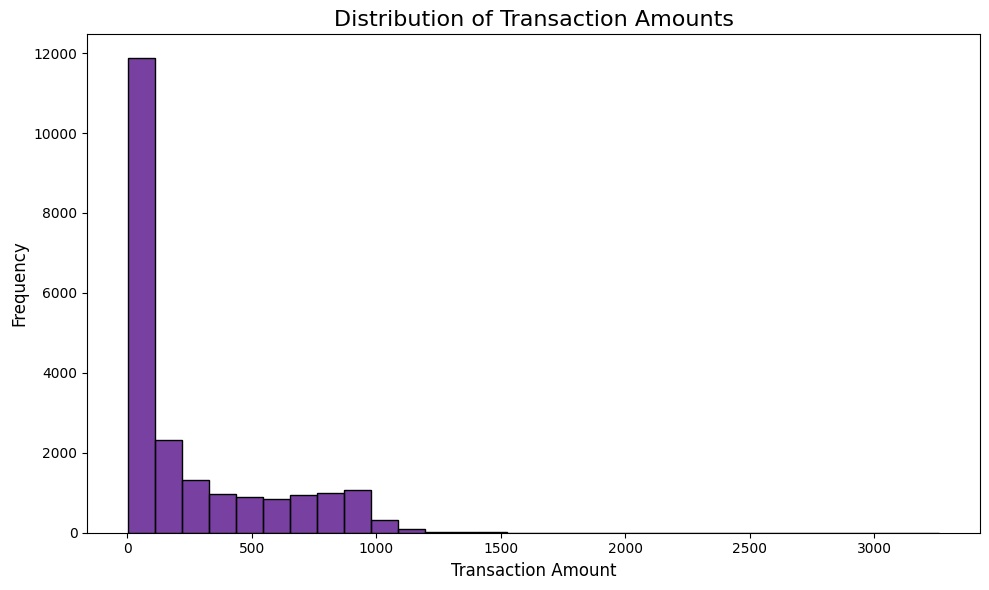

In [124]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(df['amt'], bins=30, color='indigo', kde=False)

# Set the titles and labels
plt.title('Distribution of Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# we can see the fraud transactions are high when the transaction amount is low

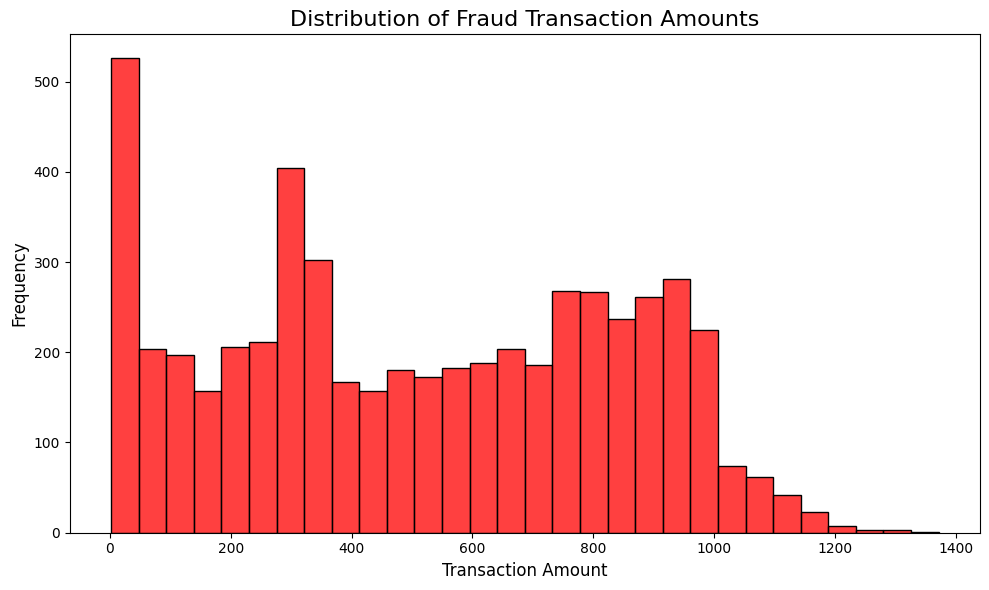

In [125]:
# Filter the dataset to include only fraud transactions (assuming 'is_fraud' column exists)
fraud_transactions = df[df['is_fraud'] == 1]

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the histogram for fraud transaction amounts
sns.histplot(fraud_transactions['amt'], bins=30, color='red', kde=False)

# Set the titles and labels
plt.title('Distribution of Fraud Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Which category is having more transactions?

In [129]:
# Grouping by 'category' and count unique 'trans_num'
category_counts = df.groupby('category')['trans_num'].nunique().reset_index(name='transaction_count')
category_counts

,category,transaction_count
0,entertainment,949
1,food_dining,869
2,gas_transport,1424
3,grocery_net,1955
4,grocery_pos,2983
5,health_fitness,2344
6,home,1303
7,kids_pets,1140
8,misc_net,815
9,misc_pos,2268


In [138]:
# Sort the category_counts DataFrame in descending order of transaction count
category_counts_sorted = category_counts.sort_values(by='transaction_count', ascending=False)

In [142]:
# Create the ColumnDataSource with sorted data
source_sorted = ColumnDataSource(category_counts_sorted)

# Define the figure with sorted categories
p = figure(
    x_range=category_counts_sorted['category'],  # Set x-axis range to the sorted categories
    height=600, width=600,
    title="Number of Transactions by Category (Descending)",
    toolbar_location=None, tools="")

# Add the bars with the sorted data
p.vbar(x='category', top='transaction_count', width=0.9, source=source_sorted,
       line_color='white',
       fill_color=factor_cmap('category', palette=Category20[len(category_counts_sorted)], factors=category_counts_sorted['category']))

# Customize the plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1  # Rotate x-axis labels if needed
p.xaxis.axis_label = 'Category'
p.yaxis.axis_label = 'Number of Transactions'

# Add hover tool
hover = HoverTool()
hover.tooltips = [
    ("Category", "@category"),
    ("Number of Transactions", "@transaction_count")
]
p.add_tools(hover)

# Show the plot
show(p)

# cleaning City data

In [143]:
#Extracting and cleaning city data
maps = df[df['is_fraud'] == 1][['city', 'lat', 'long']].drop_duplicates().sort_values('city').reset_index(drop=True)

#Counting frauds per city where 'is_fraud' = 1 and merging with maps
count = df[df['is_fraud'] == 1]['city'].value_counts().rename_axis('city').reset_index(name='count')
maps = maps.merge(count, on='city', how='left').sort_values('count')

In [146]:
maps.head()

,city,lat,long,count
1892,Laramie,41.4247,-105.4781,2
1893,Littleton,39.5994,-105.0044,2
2265,Newhall,34.3795,-118.5230,3
2269,Odessa,38.9829,-93.9757,3
3638,Vancouver,45.6892,-122.6616,3


# we can see columbus is having more number of fraud transactions

In [150]:
maps['city'].value_counts()

city
Columbus            166
Raleigh              87
Winston-Salem        86
Albany               83
San Antonio          81
                   ... 
Huntington Beach      1
Downey                1
Angwin                1
Wendel                1
Unionville            1
Name: count, Length: 216, dtype: int64

# Cleaning the date of birth and timestamp of the transaction

In [153]:
# Convert 'dob' to datetime, using 'errors="coerce"' to handle invalid formats
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y', errors='coerce')

# while converting we have inconsistent date of birth and inconsistent trans_date_time hence using errors = coerce to convert them into NaT values which are sorted in next section

In [154]:
# Convert 'trans_date_trans_time' to datetime, assuming consistent format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M', errors='coerce')

# Filling NaT values in DOB and trans_date_time by median date of birth and most common transaction date

In [157]:
# Fill NaT values in 'dob' with the median date of birth
median_dob = df['dob'].median()
df['dob'].fillna(median_dob, inplace=True)

# Fill NaT values in 'trans_date_trans_time' with the most common transaction date
most_frequent_trans_date = df['trans_date_trans_time'].mode()[0]
df['trans_date_trans_time'].fillna(most_frequent_trans_date, inplace=True)

In [160]:
missing_dob = df['dob'].isna().sum()
missing_trans_date = df['trans_date_trans_time'].isna().sum()
print(f"Missing DOB values: {missing_dob}, Missing Transaction Date/Time values: {missing_trans_date}")

Missing DOB values: 0, Missing Transaction Date/Time values: 0


In [158]:
# Extract date and time into separate columns
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time

In [159]:
# Calculate age
df['age'] = df['trans_date_trans_time'].apply(lambda x: x.year) - df['dob'].dt.year

# Filtering for fraudulent transactions
fraud_df = df[df['is_fraud'] == 1]

# Distribution for fraud counts by age

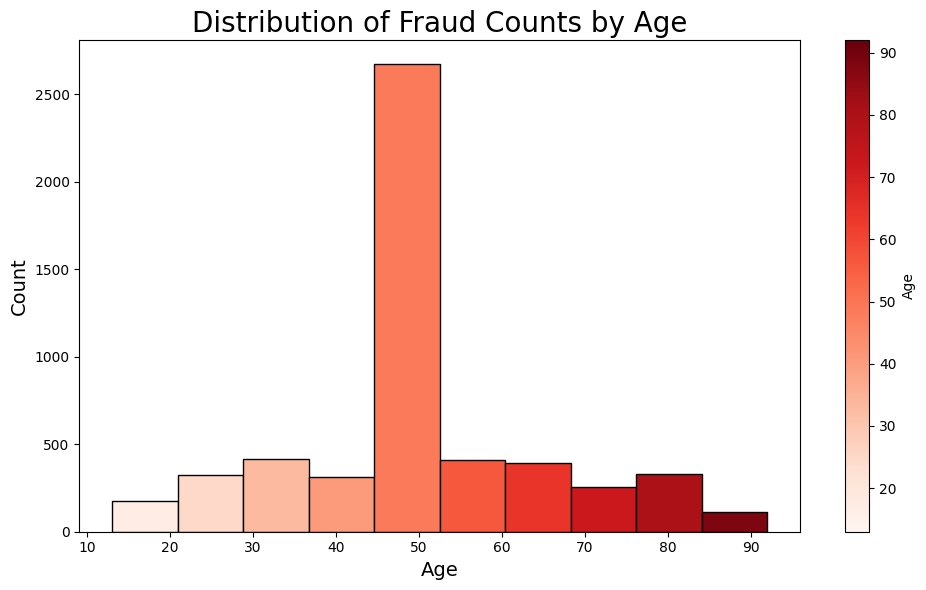

In [166]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define the age data (ensure it's from your fraud_df DataFrame)
ages = fraud_df['age']

# Create the histogram
n, bins, patches = ax.hist(ages, bins=10, color='lightgrey', edgecolor='black')

# Normalize the data to scale the color gradient
norm = Normalize(vmin=ages.min(), vmax=ages.max())

# Apply color to each bar based on the bin value
for i in range(len(patches)):
    bin_center = 0.5 * (bins[i] + bins[i+1])
    color = plt.cm.Reds(norm(bin_center))  # Use a red gradient like in Plotly
    patches[i].set_facecolor(color)

# Create the ScalarMappable for the color bar
sm = ScalarMappable(cmap='Reds', norm=norm)
sm.set_array(ages)  # Set array of values to map the colors

# Add color bar to the right to represent the gradient for Age
cbar = fig.colorbar(sm, ax=ax)  # Ensure it uses the correct axis
cbar.set_label('Age')

# Set titles and labels
ax.set_title('Distribution of Fraud Counts by Age', fontsize=20)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# we can see most number of frauds happening at the age 50

# EDA for card_networks Vs transactions(fraud)

In [170]:
# Group by card network and count the number of fraud transactions and total transactions
fraud_counts = df[df['is_fraud'] == 1].groupby('card_network')['trans_num'].count().reset_index(name='fraud_count')
total_counts = df.groupby('card_network')['trans_num'].count().reset_index(name='total_count')

In [171]:
# Merge fraud and total counts into a single DataFrame
combined_counts = pd.merge(total_counts, fraud_counts, on='card_network', how='left').fillna(0)


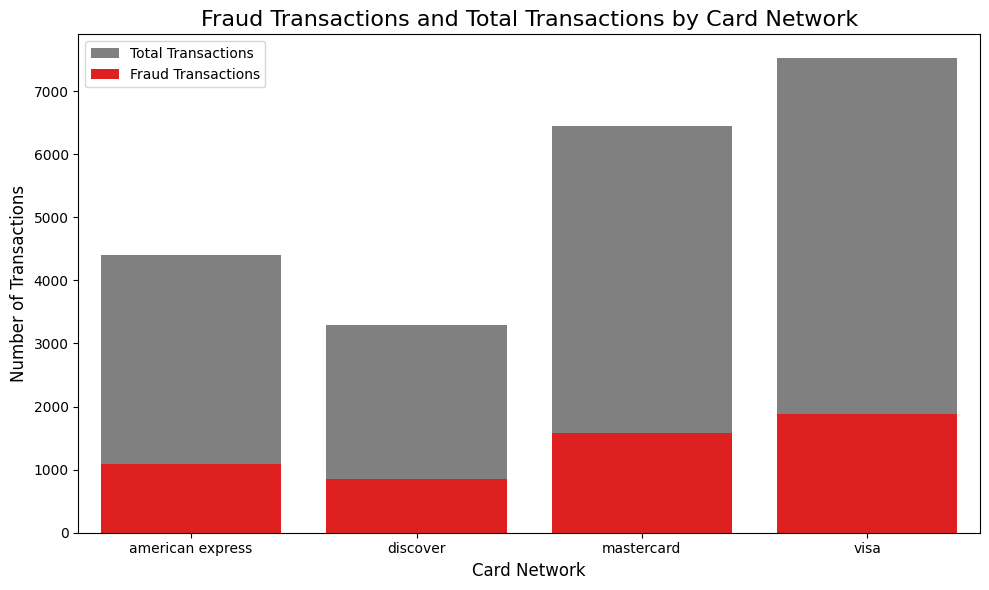

In [178]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Plot the total transactions as bars
sns.barplot(x='card_network', y='total_count', data=combined_counts, color='gray', label='Total Transactions')

# Overlay fraud transactions on the same bar graph
sns.barplot(x='card_network', y='fraud_count', data=combined_counts, color='red', label='Fraud Transactions')

# Add labels and title
plt.title('Fraud Transactions and Total Transactions by Card Network', fontsize=16)
plt.xlabel('Card Network', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Add a legend to distinguish between fraud and total transactions
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# EDA for Device_type

In [173]:
# Group by device_type and count the number of fraud transactions and total transactions
fraud_counts_device = df[df['is_fraud'] == 1].groupby('device_type')['trans_num'].count().reset_index(name='fraud_count')
total_counts_device = df.groupby('device_type')['trans_num'].count().reset_index(name='total_count')

In [174]:
# Merge fraud and total counts into a single DataFrame
combined_counts_device = pd.merge(total_counts_device, fraud_counts_device, on='device_type', how='left').fillna(0)

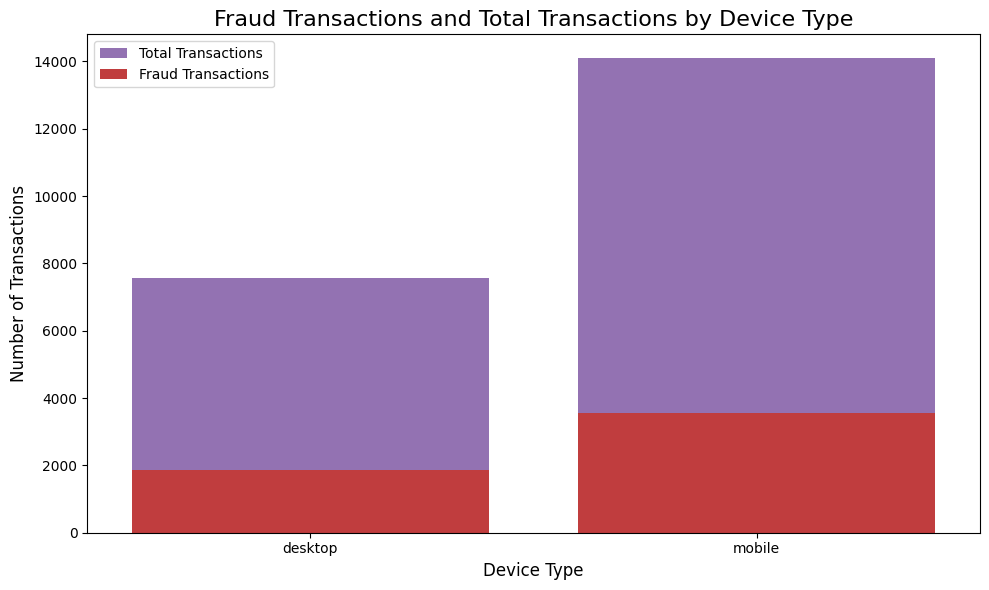

In [177]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Plot the total transactions as bars
sns.barplot(x='device_type', y='total_count', data=combined_counts_device, color='#9467bd', label='Total Transactions')

# Overlay fraud transactions on the same bar graph
sns.barplot(x='device_type', y='fraud_count', data=combined_counts_device, color='#d62728', label='Fraud Transactions')

# Add labels and title
plt.title('Fraud Transactions and Total Transactions by Device Type', fontsize=16)
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Add a legend to distinguish between fraud and total transactions
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# EDA for email_domain

In [181]:
# Group by email_domain and count the number of fraud transactions and total transactions
fraud_counts_email = df[df['is_fraud'] == 1].groupby('email_domain')['trans_num'].count().reset_index(name='fraud_count')
total_counts_email = df.groupby('email_domain')['trans_num'].count().reset_index(name='total_count')

In [182]:
# Merge fraud and total counts into a single DataFrame
combined_counts_email = pd.merge(total_counts_email, fraud_counts_email, on='email_domain', how='left').fillna(0)

In [186]:
# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(combined_counts_email)

# Define the figure
p = figure(x_range=combined_counts_email['email_domain'], height=600, width=800, 
           title="Fraud Transactions and Total Transactions by Email Domain",
           toolbar_location=None, tools="")

# Add bars for total transactions
p.vbar(x=dodge('email_domain', -0.15, range=p.x_range), top='total_count', width=0.3, source=source,
       color=Category10[3][0], legend_label="Total Transactions")

# Add bars for fraud transactions
p.vbar(x=dodge('email_domain', 0.15, range=p.x_range), top='fraud_count', width=0.3, source=source,
       color=Category10[3][1], legend_label="Fraud Transactions")

# Customize the plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = "Email Domain"
p.yaxis.axis_label = "Number of Transactions"
p.xaxis.major_label_orientation = 1  # Rotate x-axis labels

# Add hover tool for interaction
hover = HoverTool()
hover.tooltips = [
    ("Email Domain", "@email_domain"),
    ("Total Transactions", "@total_count"),
    ("Fraud Transactions", "@fraud_count")
]
p.add_tools(hover)

# Add a legend and show the plot
p.legend.orientation = "vertical"
p.legend.location = "top_right"
show(p)

# Cleaning the transaction hour to make it useful for model building

In [168]:
#Extracting hour of transaction
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour

# Giving label encoders to the caregorical columns

In [197]:
#Choosing categorical columns to fit into model training
categorical_columns = ['category', 'job','device_type', 'card_network', 'email_domain', 'device_info','state']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Converting the target varaible into INT

In [198]:
#Converting target variable to numeric
df['is_fraud'] = df['is_fraud'].astype(int)

In [199]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,...,merch_long,is_fraud,device_type,device_info,card_network,email_domain,trans_date,trans_time,age,transaction_hour
0,2019-01-04 00:58:00,"""Stokes, Christiansen and Sipes""",3,14.37,Wales,0,64.7556,-165.6723,145,1,...,-164.722603,1,1,0,2,0,2019-01-04,00:58:00,80,0
1,2019-01-04 15:06:00,Predovic Inc,11,966.11,Wales,0,64.7556,-165.6723,145,1,...,-165.473127,1,1,0,1,0,2019-01-04,15:06:00,80,15
2,2019-01-04 22:37:00,Wisozk and Sons,9,49.61,Wales,0,64.7556,-165.6723,145,1,...,-165.914542,1,0,9,2,2,2019-01-04,22:37:00,80,22
3,2019-01-04 23:06:00,Murray-Smitham,4,295.26,Wales,0,64.7556,-165.6723,145,1,...,-166.080207,1,1,10,1,0,2019-01-04,23:06:00,80,23
4,2019-01-04 23:59:00,Friesen Lt,5,18.17,Wales,0,64.7556,-165.6723,145,1,...,-165.446843,1,1,3,2,1,2019-01-04,23:59:00,80,23
